# Portfolio 1

#### Data Analysis on cycling data obtained from two different data sources namely `Strava and Golden Cheetah`. 
The aim of this portfolio is to answer some analysis questions by comparing the relationship between various variables. `Seaborn package and matplotlib` has been used for visualizing data in the form of certain graphs and plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Interpretation

Importing all the `necessary libraries` used for data analysis and data plotting in this portfolio

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('Data/strava.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
print(strava.shape)
strava.head()

(268, 10)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
print (cheetah.shape)
cheetah.head()

(251, 362)


,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

## `Starting with the analysis on the given data (Strava and Cheetah)`

In [4]:
df_common_rows = strava.join(cheetah, how='inner')
print (df_common_rows.shape)
df_common_rows.head()

(243, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


# Interpretation

Both the given dataframes have been joined through an __inner join__ (strava & cheetah)

In [5]:
remove_rides = df_common_rows[df_common_rows['device_watts'] == True]
remove_rides = remove_rides.dropna()
print (remove_rides.shape)
remove_rides.head()

(144, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


# Interpretation

Removing rides for which __device_watts = False__ from the strava dataset by using the `dropna` function.

In [6]:
remove_rides['elevation_gain'] = pd.to_numeric(remove_rides['elevation_gain'].str.split().str[0])

# Interpretation

Converting `elevation_gain` into numeric form so that data can be plotted for this variable. This variable was in string format prior to this conversion.

In [7]:
print (remove_rides.shape)
remove_rides.head()

(144, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.0,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.0,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.0,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.0,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.0,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


# Interpretation

Printing the shape of the dataset (`Number of rows and columns`) and printing the top five records

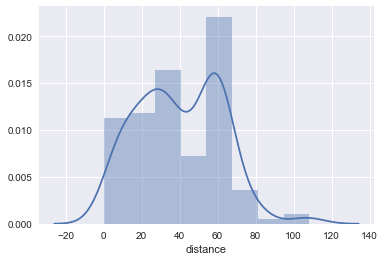

In [8]:
sns.distplot(remove_rides['distance'])
plt.show()

# Interpretation

This graph shows that the distribution pattern of `distance` is __bi-modal__. Bi-modal distributions often tend to have two peaks of data. The bi in bi-modal refers to 2.

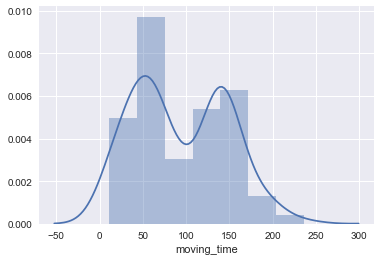

In [9]:
sns.distplot(remove_rides['moving_time'])
plt.show()

# Interpretation

This graph shows that the distribution pattern of `moving_time` is __bi-modal__. Bi-modal distributions often tend to have two peaks of data. The bi in bi-modal refers to 2.

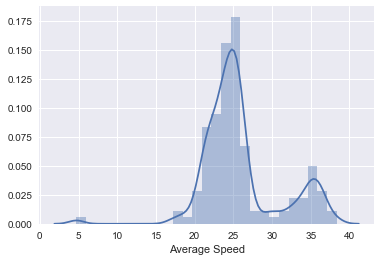

In [10]:
sns.distplot(remove_rides['Average Speed'])
plt.show()

# Interpretation

This graph shows that the distribution pattern of `Average Speed` is __Left Skewed__. For a left skewed distribution, the mean is less than the median and the tail of the distribution is longer on the left hand side.

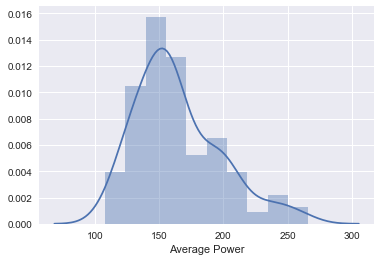

In [11]:
sns.distplot(remove_rides['Average Power'])
plt.show()

# Interpretation 
This graph shows that the distribution pattern of `Average Power` is __Normally distributed__. A normal distribution is a bell shaped curve described by it's `mean and standard deviation`.

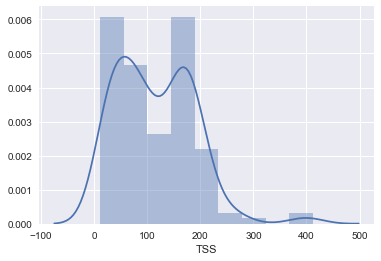

In [12]:
sns.distplot(remove_rides['TSS'])
plt.show()

# Interpretation

This graph shows that the distribution pattern of `TSS` is somewhat similar to a __right skewed distribution__ as the spread is more across the right.

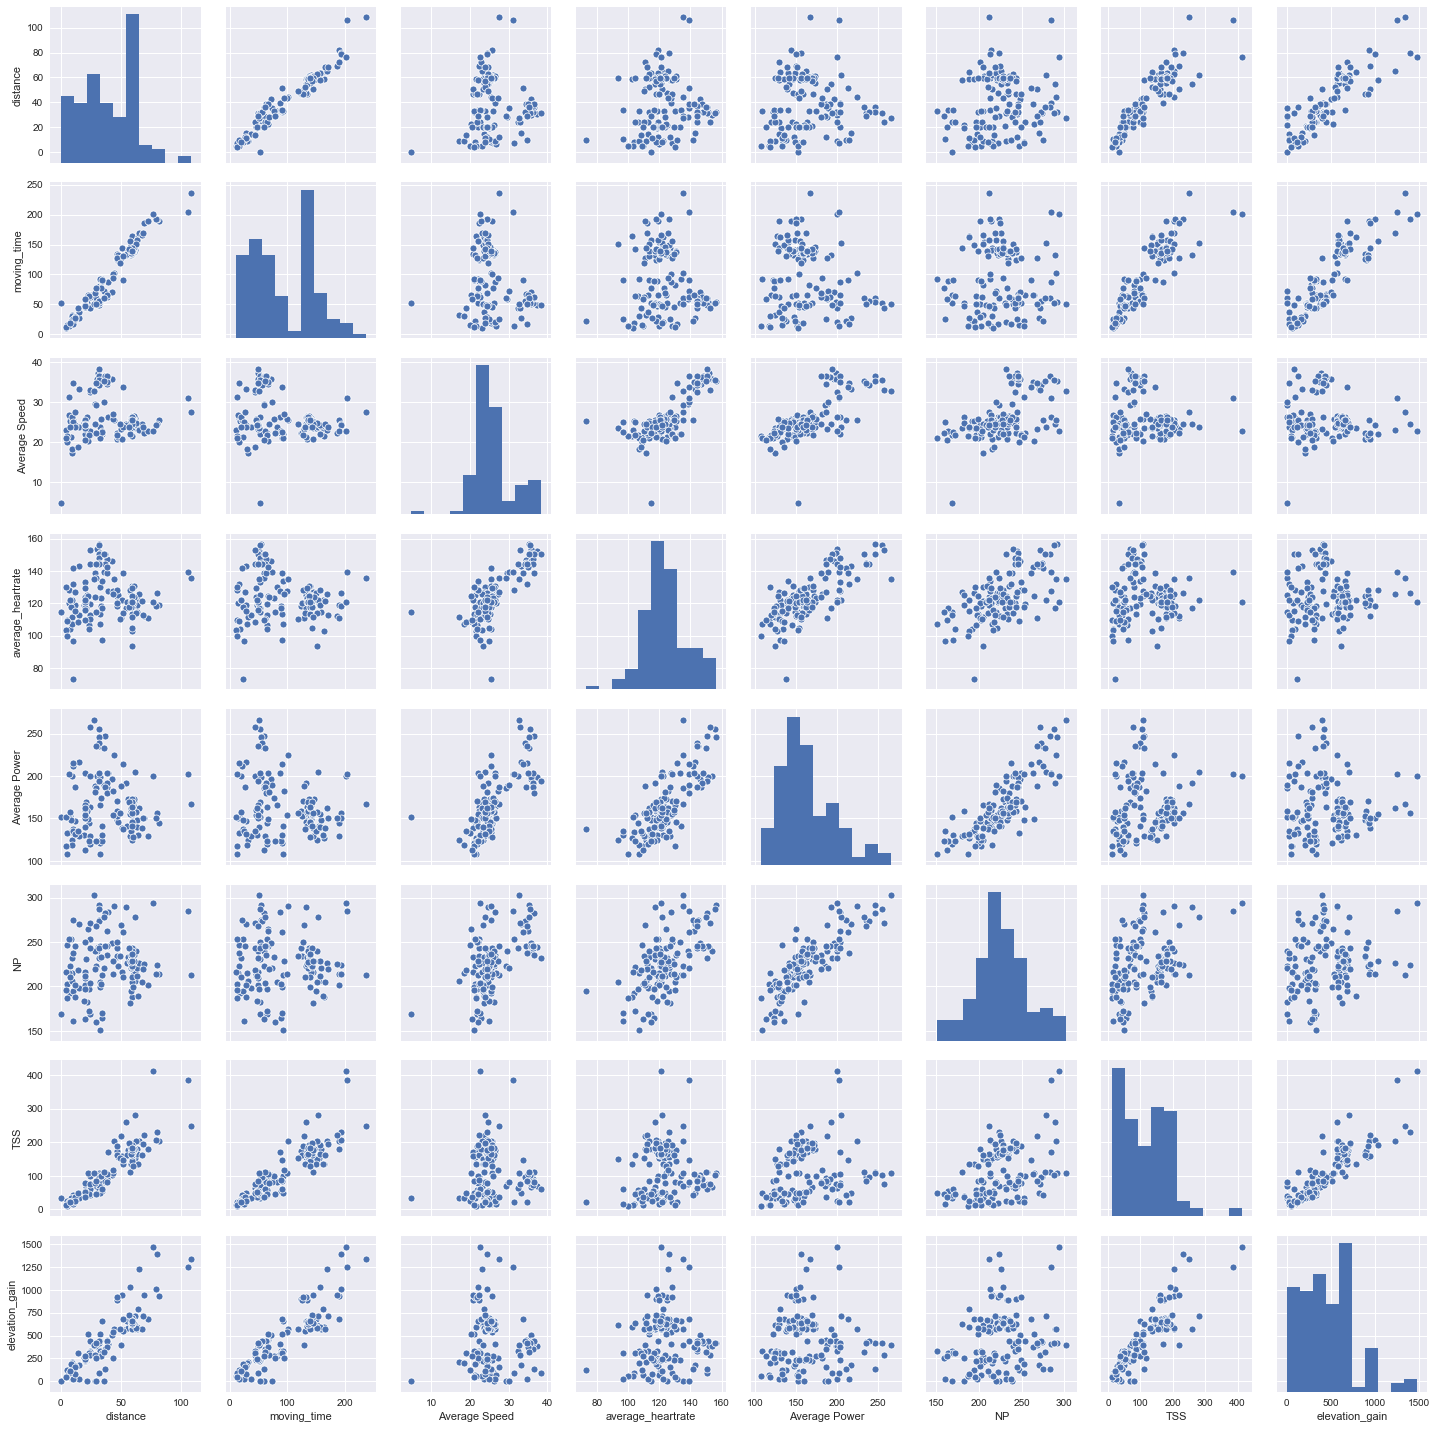

In [13]:
sns.pairplot(remove_rides[["distance","moving_time","Average Speed","average_heartrate","Average Power",
                           "NP","TSS","elevation_gain"]])
plt.show()

# Interpretation

This pairplot shows the relationship between multiple variables from the data frames such as `distance, moving_time, Average Speed, average_heartrate, Average Power, NP, TSS, elevation_gain`.

In [14]:
new_rel=remove_rides[['distance','Time Moving','Average Speed','NP','TSS','Elevation Gain','Average Heart Rate','Average Power']]
new_rel.corr()

,distance,Time Moving,Average Speed,NP,TSS,Elevation Gain,Average Heart Rate,Average Power
distance,1.000000,0.968110,0.034581,0.156948,0.909636,0.817923,0.057835,-0.010553
Time Moving,0.968110,1.000000,-0.192527,0.031393,0.897472,0.838557,-0.114745,-0.169354
Average Speed,0.034581,-0.192527,1.000000,0.536113,-0.030817,-0.117891,0.757362,0.731292
NP,0.156948,0.031393,0.536113,1.000000,0.397483,0.199964,0.596401,0.841682
TSS,0.909636,0.897472,-0.030817,0.397483,1.000000,0.840157,0.053536,0.136925
Elevation Gain,0.817923,0.838557,-0.117891,0.199964,0.840157,1.000000,0.036353,-0.040965
Average Heart Rate,0.057835,-0.114745,0.757362,0.596401,0.053536,0.036353,1.000000,0.758055
Average Power,-0.010553,-0.169354,0.731292,0.841682,0.136925,-0.040965,0.758055,1.000000


# Interpretation

From This correlation matrix we can predict the following observations:

###### Highly correlated: 
Distance with Time Moving, distance with TSS, distance with Elevation Gain.

###### Weakly correlated:
Distance with Average Speed, Distance with Normalized Power, Distance with Average Heart Rate and Distance with Average Power.

###### Negatively correlated:

Time Moving and Average Power, Average Speed and Time Moving, Average Speed and Elevation Gain etc.

In [15]:
dfworkout=remove_rides[remove_rides.workout_type=='Workout']
print (dfworkout.shape)
dfworkout.head()

(5, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-05-13 20:44:30+00:00,114.8,14.0,164.2,True,0.0,52,0.0,9,52,Workout,...,0,0,0,0,0,0,0,169.042,0.63075,33.3201
2018-05-21 20:34:30+00:00,138.5,11.0,188.2,True,28.3,59,0.0,8,59,Workout,...,0,0,0,0,0,0,0,239.275,0.89282,76.5235
2018-05-28 20:47:42+00:00,135.4,10.0,185.6,True,28.9,60,0.0,7,60,Workout,...,0,0,0,0,0,0,0,223.167,0.83271,68.4551
2018-06-04 20:50:03+00:00,139.3,11.0,191.1,True,35.8,73,0.0,11,73,Workout,...,0,0,0,0,0,0,0,220.407,0.82242,80.7883
2018-08-01 20:41:09+00:00,125.0,10.0,161.0,True,22.0,52,0.0,6,52,Workout,...,0,0,0,0,0,0,0,182.578,0.68126,39.0891


# Interpretation

###### This code fetched the records with `workout_type as Workout`.

In [16]:
dfride=remove_rides[remove_rides.workout_type=='Ride']
print (dfride.shape)
dfride.head()

(113, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.0,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.0,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.0,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.0,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970
2018-02-10 20:21:37+00:00,103.9,17.0,134.9,True,7.8,19,92.0,8,18,Ride,...,0,0,0,0,0,0,0,192.117,0.71685,15.7590


# Interpretation

###### The below code fetched the records with `workout_type as Ride`.

In [17]:
dfrace=remove_rides[remove_rides.workout_type=='Race']
print (dfrace.shape)
dfrace.head()

(26, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.0,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-10 20:46:02+00:00,152.1,19.0,198.9,True,31.0,49,387.0,21,49,Race,...,0,0,0,0,0,0,0,244.500,0.91231,69.2902
2018-03-03 20:02:23+00:00,143.0,18.0,217.3,True,15.5,32,175.0,15,28,Race,...,0,0,0,0,0,0,0,270.462,1.00919,47.6412
2018-03-24 20:45:44+00:00,153.6,16.0,200.2,True,30.1,50,381.0,16,50,Race,...,0,0,0,0,0,0,0,240.085,0.89584,67.9698
2018-04-07 21:47:39+00:00,141.8,17.0,223.7,True,10.0,23,130.0,11,22,Race,...,0,0,0,0,0,0,0,275.057,1.02633,41.5492


# Interpretation

###### The below code fetched the records with workout_type as Race.

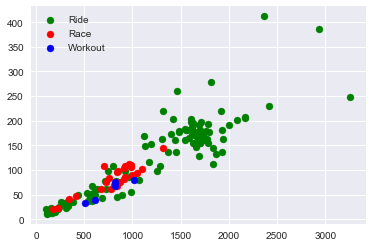

In [18]:
plt.scatter(dfride["Calories (HR)"],dfride["TSS"],color='green', label="Ride")
plt.scatter(dfrace["Calories (HR)"],dfrace["TSS"],color='red', label="Race")
plt.scatter(dfworkout["Calories (HR)"],dfworkout["TSS"],color='blue',label="Workout")
plt.legend()
plt.show()

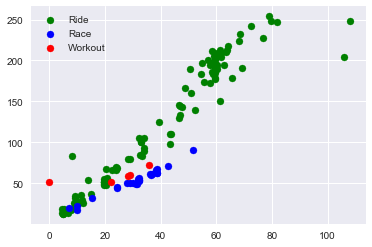

In [19]:
plt.scatter(dfride["distance"],dfride["elapsed_time"],color='green', label="Ride")
plt.scatter(dfrace["distance"],dfrace["elapsed_time"],color='blue', label="Race")
plt.scatter(dfworkout["distance"],dfworkout["elapsed_time"],color='red',label="Workout")
plt.legend()
plt.show()

# Interpretation

In this `scatter plot` between `Distance and elapsed_time` for the categories `Ride, Race and Workout`, we can draw the below conclusions:

1. For the category `Ride`, as distance increases, the elapsed_time also increases continuously denoting a strong positive correlation.
2. For the category `Race`, as distance increases, the elapsed_time also increases to a certain level.
3. For the category `Workout`, as distance increases, the elapsed_time is steady at some point and then increases slightly.

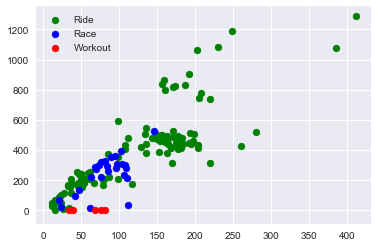

In [20]:
plt.scatter(dfride["TSS"],dfride["Elevation Gain"],color='green', label="Ride")
plt.scatter(dfrace["TSS"],dfrace["Elevation Gain"],color='blue', label="Race")
plt.scatter(dfworkout["TSS"],dfworkout["Elevation Gain"],color='red',label="Workout")
plt.legend()
plt.show()

# Interpretation

In this scatter plot between TSS and Elevation Gain for Ride, Race and Workout, we can draw the below conclusions:

1. For the category `Ride`, we see a positive relation between the TSS and Elevation Gain.
2. For the category `Race`, at some points for increasing TSS, we have minimal value for Elevation Gain, however Elevation Gain increases at some point with increase in TSS.
3. For the category `Workout`, with increase in TSS, the value of Elevation Gain remains at 0. (Not at all correlated).

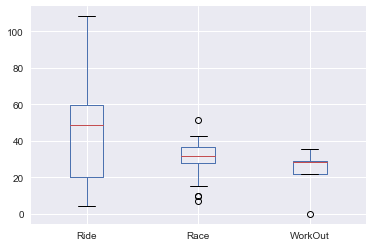

In [21]:
distdf=pd.concat([dfride['Distance'],dfrace['Distance'],dfworkout['Distance']], axis=1, keys=['Ride', 'Race','WorkOut'])
distdf.boxplot()
plt.show()

# Interpretation

In this boxplot, we can draw the following conclusions for the variable Distance:

1. For the category `Ride`, the values start just above 0 and are nicely spread above 100 (i.e whisker extends from around 0 to somewhere around 108) and there are no outliers outside this range.
2. For the category `Race`, we can clearly see that there are multiple outliers being identified (data falls outside the range of the boxplot) and the whisker does not extend much as compared to the boxplot for workout_type = Ride
3. For the category `WorkOut`, we can conclude by saying that there is one outlier outside the range and the spread of the boxplot is quite small.

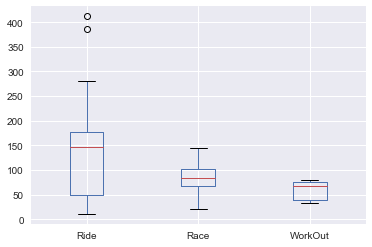

In [22]:
tssdf=pd.concat([dfride['TSS'],dfrace['TSS'],dfworkout['TSS']], axis=1, keys=['Ride', 'Race','WorkOut'])
tssdf.boxplot()
plt.show()

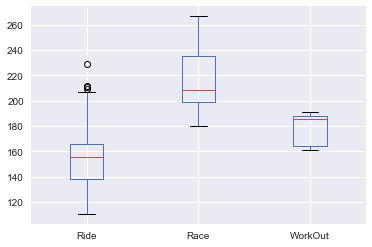

In [23]:
avgwattdf=pd.concat([dfride['average_watts'],dfrace['average_watts'],dfworkout['average_watts']], axis=1, keys=['Ride', 'Race','WorkOut'])
avgwattdf.boxplot()
plt.show()

# Interpretation

For the category `Ride`, we can say that there are multiple outliers in the data (out of range values), while there are no outliers for 
the category `Race and Workout`.

In [24]:
kudos_corr=[remove_rides[remove_rides.columns[1:]].corr()['kudos'][:]]
kudos_corr_df = pd.DataFrame(kudos_corr)
kudos_corr_df=kudos_corr_df.loc[:,kudos_corr_df.gt(0.7).any()]
kudos_corr_df

,distance,kudos,Distance,Max Core Temperature,Aerobic TISS,Distance Swim,TRIMP Points,TRIMP(100) Points,TRIMP Zonal Points
kudos,0.722458,1.0,0.722582,0.73212,0.719443,0.722582,0.740524,0.740524,0.722062


# Interpretation

By this correlation table, we can conclude that the below factors leads to more Kudos/Likes:

Distance, Work, Aerobic TISS, P6 Time in Pace Zone, Distance Swim, L7 Time in Zone, TRIMP Zonal Points, W' Work and W2 W'bal Moderate Fatigue variables with a correlation of above 0.7 for each with kudos.

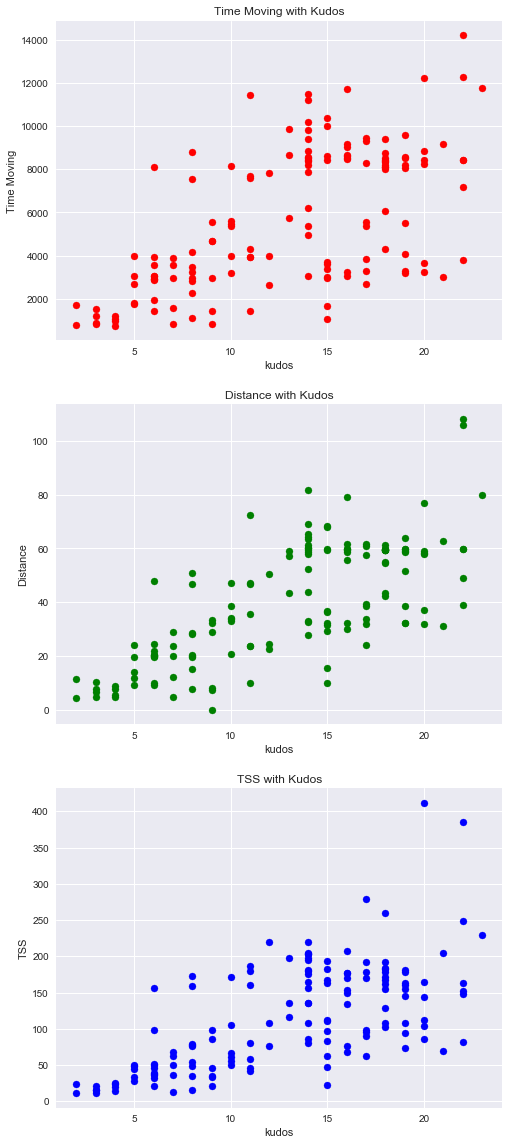

In [25]:
fig,axs=plt.subplots(3,1,figsize=(8,20))

axs[0].scatter(remove_rides['kudos'], remove_rides['Time Moving'], color='red')
axs[0].set_xlabel('kudos')
axs[0].set_ylabel('Time Moving')
axs[0].set_title('Time Moving with Kudos')

axs[1].scatter(remove_rides['kudos'], remove_rides['Distance'], color='green')
axs[1].set_xlabel('kudos')
axs[1].set_ylabel('Distance')
axs[1].set_title('Distance with Kudos')

axs[2].scatter(remove_rides['kudos'], remove_rides['TSS'], color='blue')
axs[2].set_xlabel('kudos')
axs[2].set_ylabel('TSS')
axs[2].set_title('TSS with Kudos')
plt.show()

In [26]:
month_name=[]
for e in remove_rides.index:
    month_name.append((calendar.month_name[e.month]))
remove_rides.insert(2, "Month", month_name, True) 
month_data_df=pd.DataFrame(remove_rides.groupby(['Month']).distance.sum())
month_data_df['TSS']=remove_rides.groupby(['Month']).TSS.sum()
month_data_df['Average Speed']=remove_rides.groupby(['Month'])['Average Speed'].mean()
month_data_df

,distance,TSS,Average Speed
Month,,,
April,782.4,2274.6801,24.918635
August,127.5,522.1341,25.169500
December,400.4,1106.8375,27.075000
February,700.8,1966.2923,26.016750
January,390.8,1083.7889,26.182430
July,461.5,1241.1682,25.500000
June,560.2,1617.3223,27.086453
March,871.1,2762.8343,26.268610
May,598.3,1702.5335,25.351987


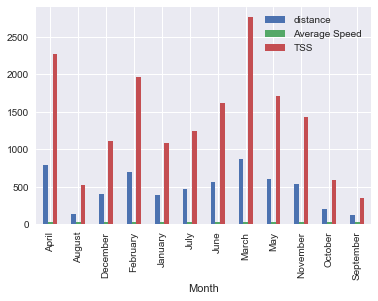

In [27]:
month_data_df.plot( y=["distance", "Average Speed", "TSS"], kind="bar")
plt.rcParams["figure.figsize"] = (9,11)
plt.legend(loc='best', prop={'size': 10})
plt.show()

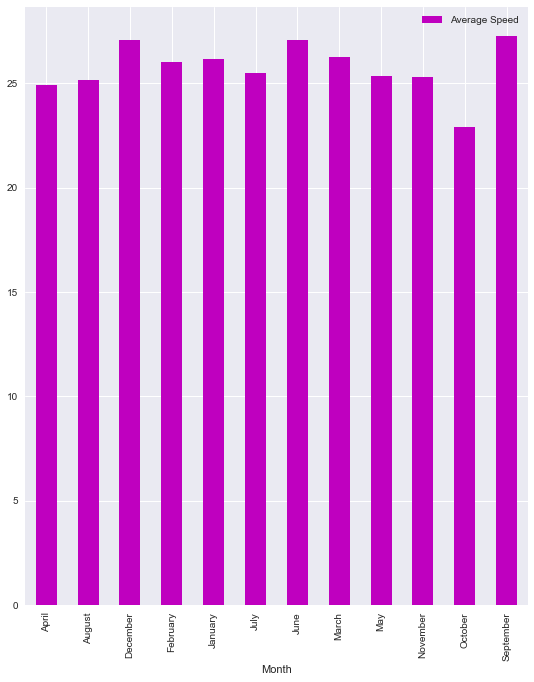

In [28]:
month_data_df.plot( y=["Average Speed"], kind="bar", color="m")
plt.rcParams["figure.figsize"] = (9,11)
plt.legend(loc='best', prop={'size':10})
plt.show()